# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np

# Autoreload modules
%load_ext autoreload
%autoreload 2

# Model class
from HSM import HSMC

# Matplotlib 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D # Used implictely when doing 3D plots
import matplotlib.pyplot as plt # baseline module

# Predefine options for all plots
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-"})
plt.rcParams.update({'font.size': 14})


In [2]:
model = HSMC()

# Question 1: alternative 1

We modified the HSM_Stefano class so that it now has a new function called "HF_on_HM_table" that takes as attribute vectors of values and plots a table with values of $H_F/H_M$ for every combination of values of $\sigma$ and $\alpha$.
One major addition to the class module is the definition of the total value of home production consumption so taht now can take different functional forms depending on the value of $\sigma$.

In [3]:
# Illustrates changes in optimal HF/HM for values of alpha & sigma

alpha_val=[0.25,0.50,0.75]
sigma_val=[0.5,1.0,1.5]
model.tableHFHM(alpha_val,sigma_val)

# Problems:
# - takes approx 20 sec to run
# - Runtime warnings to debug
# - Values changed from last time!


c:\Users\aske9\Downloads\projects-2023-frederikke_vigh\projects-2023-frederikke_vigh\inauguralproject\HSM.py:62: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


a|s    0.50  1.00  1.50  
0.25  0.545 0.308 0.214
0.50  1.000 1.000 1.000
0.75  1.833 3.250 4.667


# Question 1: alternative 2

We used a loop to running on the values $\sigma$ and $\alpha$ contained into two different vectors to return a new array containing the values of $H_F/H_M$ corresponding to each combination of $\sigma$ and $\alpha$ values.
The code is defined outside the class; no changes have been made at the class module beside expanding it to take different values of sigma.

In [4]:
alpha_val=[0.25,0.50,0.75]
sigma_val=[0.5,1.0,1.5]

# loop to make table

ratio_HF_HM=[]
for alpha in alpha_val:
    for sigma in sigma_val:
        model.par.alpha = alpha
        model.par.sigma = sigma
        result = model.solve_discrete()
        ratio_HF_HM.append(result.HF/result.HM)
print(ratio_HF_HM)

# To be done: 
#   a. plotting table or graph from results
#   b. define it as a function stored in a separate .py file

[0.5454545454545454, 0.3076923076923077, 0.21428571428571427, 1.0, 1.0, 1.0, 1.8333333333333333, 3.25, 4.666666666666667]


**To Sum Up:**

Alternative 1 and 2 are practically the same. The only difference is that 1 runs inside the class and returns the values directly as a table, while 2 runs outside the class and returns the values as an array.

I think alternative 2 could be better because:
- Does not overload the class module;
- Return in array form could be useful.

We must make the appropriate changes to plot the result as table and to make it a function, stored in a separate file.

# Question 2:

Easier than alternative 1, practically equal to solution to question 1, just different inputs and outputs

<Figure size 432x288 with 0 Axes>

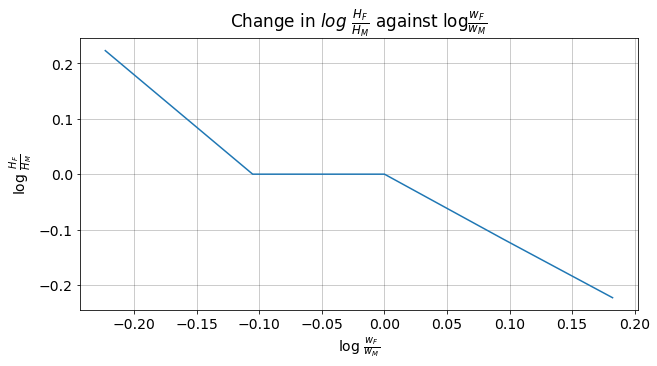

In [5]:
# Idea: solving as a class function using sol_wf_vec
model.par.sigma = 1
model.par.alpha = 0.5
X, Y = model.solve_wF_vec(discrete=True)

plt.figure()
plt.figure(figsize=(10,5))

plt.plot(X, Y)
plt.title('Change in '+r'$log\ \frac{H_F}{H_M}$' + ' against ' + r'$\log \frac{w_F}{w_M}$')
plt.xlabel(r'$\log\ \frac{w_F}{w_M}$')
plt.ylabel(r'$\log\ \frac{H_F}{H_M}$')
plt.show()

# Problems:
# - Graph changes unespectedly after modifications
# - Graph is strange: right economic intuition ?
# - Runtime warning to debug

# Question 3

<Figure size 432x288 with 0 Axes>

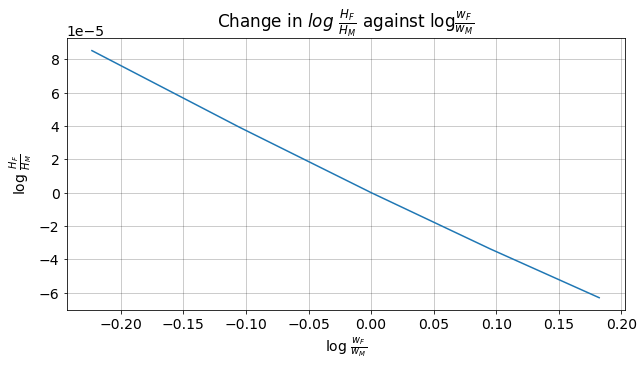

In [6]:
model.par.sigma = 1
model.par.alpha = 0.5
X, Y = model.solve_wF_vec(discrete=False)

plt.figure()
plt.figure(figsize=(10,5))

plt.plot(X, Y)
plt.title('Change in '+r'$log\ \frac{H_F}{H_M}$' + ' against ' + r'$\log \frac{w_F}{w_M}$')
plt.xlabel(r'$\log\ \frac{w_F}{w_M}$')
plt.ylabel(r'$\log\ \frac{H_F}{H_M}$')
plt.show()

## To do: 
- Check consistency of results with economic intuition from model
- Understand why question 2's graph changed
- Complete comments and documentation on code

ADD CONCISE CONLUSION.

##QUESTION 4

In [9]:
from HSM import HSMC

model.estimate()


alpha =  0.831879614467073
sigma =  0.08939081219694392
